In [ ]:
#Elena Karlsen-Ayala
#June 
#PLEASE NOTE THAT I CHANGED MY VARIABLES IN THE CSV FILE TO BE TIME_DATE AND WATER_LEVEL!!!!



In [ ]:
#Write a script that opens the file, uses a for loop to read through the file line by line and 
#reports the highest water level and the date and time that was observed.

In [6]:
fhand = open('CO-OPS.csv')
#print(fhand)   #you can get rid of this eventually if you don't want file name 

max_number = 0
date = 0
count = 0 

fhand.readline() #this will read. the first line and move onto the second for the loop, don't necesarily need this line

for line in fhand:
    #print(line)                   #mostly a test when writing the code
    line = line.rstrip()           #get rid of blank spaces
    fields = line.split(",")       #denote that its comma separated 
    if count > 0: 
        try:
            if float(fields[1]) > max_number:
                max_number = float(fields[1])
                date=fields[0]        #remember to store this number too since we want to print the date and value 
        except:
            print(f'FYI: bad data on {line}')   #this continues the loop when we get to a line with missing data OR strings
    count+=1
        
print(f'Highest water level was {max_number} on {date}.')
    


FYI: bad data on 10/10/18 18:18,,,1,1,1,1,p
Highest water level was 6.647 on 10/10/18 18:06.


In [24]:
#Write a script that reads the file into a Pandas dataframe and reports the highest water level and 
#the date and time that was observed.

In [7]:
import pandas as pd  

file = "CO-OPS.csv"
 

def read():
    try:
        data=pd.read_csv(file,usecols=[0,1]) 
        data.columns=data.columns.str.strip()  #remove white space from columns
        sorted_data=data.sort_values(by=["Water_Level"], ascending=False)
        answer=sorted_data.head(1)
        print(answer)
    except:
        print('Houston we have a problem')
        exit()
read()

  


          Date_Time  Water_Level
421  10/10/18 18:06        6.647


In [ ]:
#Write a script that calculates the fastest rise in water level 
#per 6-minute period between measurements & reports the data and time that was observed 
#and the change in water level 
#during that period. You can use line by line or dataframe for this

In [8]:
import pandas as pd        #super important never forget

file = "CO-OPS.csv" 

data=pd.read_csv(file,usecols=[0,1])  #store only first and second columns when you read in the csv

data.columns=data.columns.str.strip() #removes white space from column

data['Difference_Between']=data.Water_Level.diff() #creates new column 'Difference_Between' and uses the diff method to calculate differences in the 'water_level' column... default value is to calc diff between previous line.

sorted_data=data.sort_values(by=["Difference_Between"], ascending=False) #sort values by 'Diff' column, ascending=false

top_answer=sorted_data.iloc[[0]] #this is if the top value is on the first line

print("Record of fastest rise in water level is:")
print(top_answer.to_string(index=False))       #this will hide row number and just print info as string

Record of fastest rise in water level is:
      Date_Time  Water_Level  Difference_Between
 10/10/18 17:42        5.591                0.64


In [ ]:
#Write a script that plots a line graph of water level over time using matplotlib.

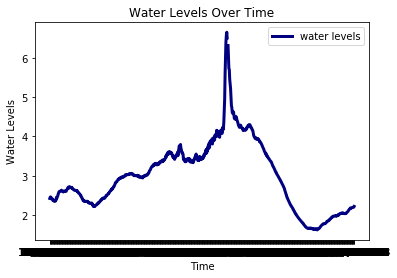

<Figure size 432x288 with 0 Axes>

In [9]:
import pandas as pd

from matplotlib import pyplot as plt #make sure to import this too after importing pandas 

sample_data = pd.read_csv('CO-OPS.csv') #read data and assign it to the variable sample_data

sample_data                          #to visualize, notice I had to change the file name in order to get the variables to not have spaces 

sample_data.columns = sample_data.columns.str.strip()       #get rid of white spaces

plt.plot(sample_data.Date_Time, sample_data.Water_Level, color='navy', linewidth=3)     #plots X,Y variables as such, increasing width to 3, and makes line navy color  

plt.title("Water Levels Over Time")                          #adds title
plt.xlabel("Time")
plt.ylabel("Water Levels")
plt.legend(["water levels"])                                  #add legend 
plt.show()

plt.savefig("Water.jpg")                                     #save graph as a jPEG